In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [44]:
# Load csv file
data = pd.read_csv('CPSData.csv')

In [45]:
# print(data.columns)

In [62]:
# Step 2: Group Data by Region and Race
grouped_data = filteredData.groupby(['Region', 'Race']).agg(
    AvgHouseholdSize=('PeopleInHousehold', 'mean'),
    MedianHouseholdSize=('PeopleInHousehold', 'median'),
    Count=('PeopleInHousehold', 'size')
).reset_index()

# Display the grouped data
grouped_data.head()

,Region,Race,AvgHouseholdSize,MedianHouseholdSize,Count
0,Midwest,American Indian,3.337778,3.0,225
1,Midwest,Asian,3.197208,3.0,573
2,Midwest,Black,2.821347,2.0,1752
3,Midwest,Hispanic,3.555461,4.0,1181
4,Midwest,Multiracial,3.055556,3.0,216


In [63]:
# Group data by Industry and Race, and calculate counts
industry_representation = filteredData.groupby(['Industry', 'Race']).size().unstack(fill_value=0)

# Calculate percentage representation within each industry
industry_representation_pct = industry_representation.div(industry_representation.sum(axis=1), axis=0) * 100

# Display representation percentages
industry_representation_pct.head()

Race,American Indian,Asian,Black,Hispanic,Multiracial,Pacific Islander,White
Industry,,,,,,,
"Agriculture, forestry, fishing, and hunting",0.640000,1.360000,1.200000,16.560000,0.560000,0.160000,79.520000
Armed forces,0.000000,3.703704,14.814815,14.814815,0.000000,0.000000,66.666667
Construction,0.786309,1.942646,4.209066,18.455134,1.387604,0.370028,72.849214
Educational and health services,0.825128,4.715019,11.309111,9.055609,1.199556,0.374428,72.521148
Financial,0.328330,4.948405,7.833021,8.278612,0.984991,0.257974,77.368668


Education             Associate degree  Bachelor's degree  Doctorate degree  \
Citizenship                                                                   
Citizen, Native              10.131275          19.177663          1.338820   
Citizen, Naturalized          9.053809          22.218863          2.917170   
Non-Citizen                   4.707646          14.317841          2.083958   

Education             High school  Master's degree  No high school diploma  \
Citizenship                                                                  
Citizen, Native         30.572938         7.622546               11.696821   
Citizen, Naturalized    26.647521         8.585248               17.759976   
Non-Citizen             25.622189         7.481259               36.011994   

Education             Some college, no degree  
Citizenship                                    
Citizen, Native                     19.459937  
Citizen, Naturalized                12.817412  
Non-Citizen          

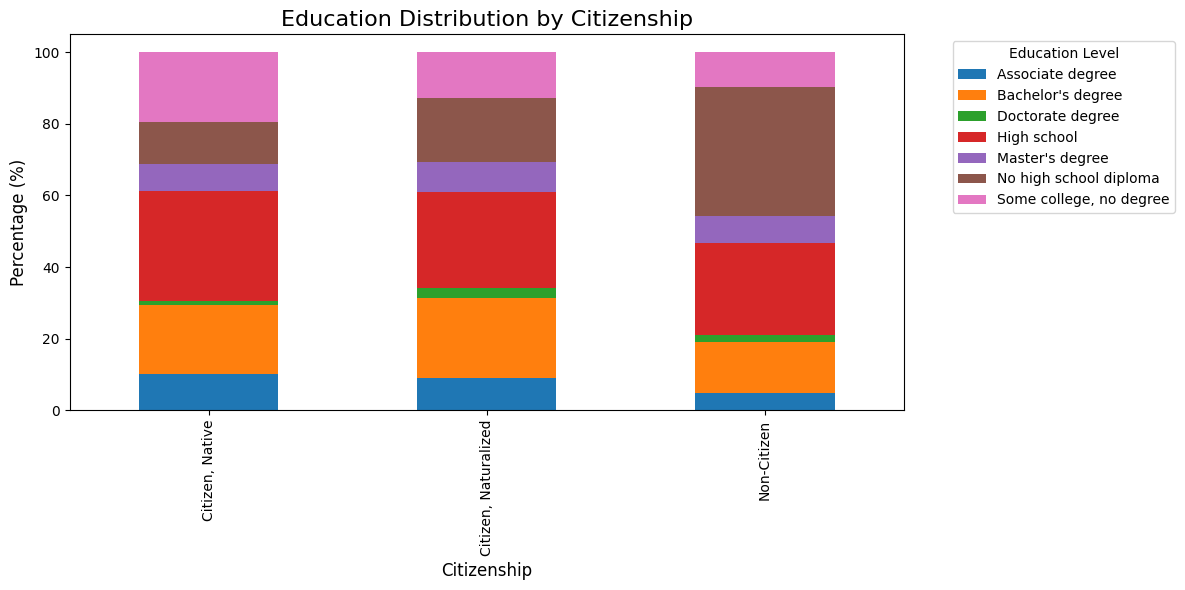

In [64]:
# Group by Citizenship and Education, and calculate counts
education_citizenship = filteredData.groupby(['Citizenship', 'Education']).size().unstack(fill_value=0)

# Calculate percentage distribution within each citizenship group
education_citizenship_pct = education_citizenship.div(education_citizenship.sum(axis=1), axis=0) * 100

# Display grouped data
print(education_citizenship_pct)

# Plot stacked bar chart
education_citizenship_pct.plot(kind='bar', figsize=(12, 6), stacked=True)

# Add titles and labels
plt.title('Education Distribution by Citizenship', fontsize=16)
plt.xlabel('Citizenship', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10356\3423273649.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=demographics, patch_artist=True, boxprops=dict(facecolor="#66b3ff"))


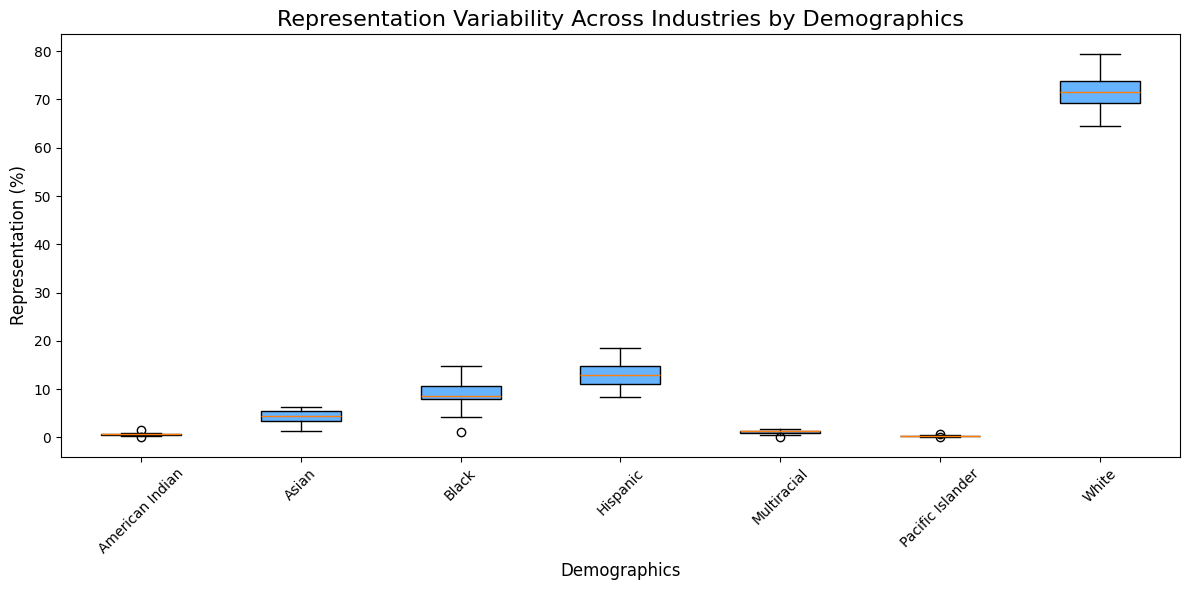

In [65]:
# Melt data for plotting
industry_melted = industry_representation_pct.reset_index().melt(
    id_vars='Industry', var_name='Demographic', value_name='Representation'
)

# Group data by demographics for box plot
demographics = industry_melted['Demographic'].unique()
data = [industry_melted[industry_melted['Demographic'] == demo]['Representation'] for demo in demographics]

# Plot box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=demographics, patch_artist=True, boxprops=dict(facecolor="#66b3ff"))

# Add labels
plt.title('Representation Variability Across Industries by Demographics', fontsize=16)
plt.xlabel('Demographics', fontsize=12)
plt.ylabel('Representation (%)', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
